<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/6_Ride_Share_Insights_Weather's_Impact_on_Travel_Trends_in_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Working as an analyst for Zuber, a pioneering ride-sharing company launched in Chicago, presents a unique opportunity to delve into the dynamics of urban transportation. The core mission involves deciphering patterns within accessible information, aiming to grasp passenger preferences and the repercussions of external factors like weather on travel frequencies. This analytical journey will pivot around the utilization of a database for scrutinizing competitor data and validating hypotheses concerning the weather's impact on ride frequency.

## Objective

The primary goal is to leverage data analysis to shed light on passenger behavior and external influences on ride-sharing services, focusing on weather conditions. This entails:

An in-depth exploratory analysis of trip data to discern preferences.
A hypothesis testing to ascertain the effect of weather conditions on the duration of rides.

## Stages

* Stage 1: Data Preparation and Initial Analysis
  * Import the datasets project_sql_result_01.csv and project_sql_result_04.csv, which contain information on taxi company rides and average trips to various drop-off locations in Chicago, respectively.
  * Conduct a preliminary examination of the datasets to understand their structure, ensuring the data types are correctly identified for analysis.
* Stage 2: Exploratory Data Analysis (EDA)
  * Identify the top 10 drop-off locations based on average trips, highlighting areas with the highest demand.
  * Generate visualizations to represent the number of trips associated with each taxi company and to display the 10 most popular drop-off locations, facilitating an understanding of market share and passenger preferences.
* Stage 3: Hypothesis Testing
  * Utilize the dataset project_sql_result_07.csv, which includes information on trips from Loop to O'Hare International Airport, focusing on start times, weather conditions, and trip duration.
  * Test the hypothesis that "The average duration of rides from Loop to O'Hare International Airport changes on rainy Saturdays." Define the significance level (alpha) independently, choosing appropriate statistical tests based on data distribution and research questions.
  * Formulating Hypotheses:
    * Null Hypothesis (H0): The average trip duration from Loop to O'Hare does not change during rainy Saturdays compared to non-rainy Saturdays.
    * Alternative Hypothesis (H1): The average trip duration from Loop to O'Hare is different on rainy Saturdays compared to non-rainy Saturdays.
  * Criteria for Hypothesis Testing:
    * The choice of hypothesis test will depend on the data distribution. If the trip duration data is normally distributed, a t-test can be used. If not, non-parametric tests like the Mann-Whitney U test might be more appropriate.
    * The reason for selecting these tests hinges on their ability to compare means (t-test) or medians (Mann-Whitney U) between two independent samples under different conditions (rainy vs. non-rainy Saturdays), providing insight into the weather's impact on trip durations.
    
* Conclusion

This comprehensive analysis will not only offer insights into the operational and environmental factors affecting ride-sharing patterns but also bolster Zuber’s strategic decision-making in enhancing service reliability and customer satisfaction under varying weather conditions.

# Stage 1: Data Preparation and Initial Analysis

Open data related to Zuber, then study the data.

Load the libraries that we think are needed for this project. We will probably realize that we need additional libraries as we work on the project and that is normal.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Muat semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

import warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

Load this project data and read the general information.

## Taxi Trip Data for each taxi company

In [17]:
# Load the data file into a DataFrame
df_trips = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/6. Ride-Share Insights/moved_project_sql_result_01.csv')

In [18]:
# Let's see how many rows and columns our dataset has
df_trips.shape

(64, 2)

In [19]:
# Display general information/summary about the DataFrame
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [20]:
# Displays sample data
df_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [21]:
# Describe from general information
df_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [22]:
# View data types
df_trips.dtypes

company_name    object
trips_amount     int64
dtype: object

In [23]:
# Check for missing values
df_trips.isnull().sum().sort_values(ascending=False) / df_trips.shape[0] *100

company_name    0.0
trips_amount    0.0
dtype: float64

**Conclusion: Analysis of Taxi Trip Data**

Upon analyzing the taxi trip data for each taxi company, several insights and observations emerge, shedding light on the trends and patterns within the dataset.

1. General Overview:
  * The dataset comprises 64 entries, each representing a taxi company.
  * Two columns are present: 'company_name' and 'trips_amount'.
  * The 'trips_amount' column indicates the number of trips associated with each taxi company.
  * There are no missing values in the dataset.
2. Data Distribution:
  * The mean number of trips per company is approximately 2145.48, with a standard deviation of 3812.31.
  * The minimum number of trips recorded is 2, while the maximum is 19558.
  * The median number of trips is 178.5, indicating a right-skewed distribution with a few companies having significantly higher trip volumes.
3. Insights and Anomalies:
  * An anomaly exists in the dataset, characterized by a significant disparity in trip volumes among taxi companies.
  * Some companies have exceptionally high trip amounts compared to others, such as 'Flash Cab' with 19558 trips and 'Taxi Affiliation Services' with 11422 trips.
  * Conversely, there are companies with minimal trip amounts, contributing to the dataset's right-skewed distribution.
  * The presence of anomalies suggests varying levels of popularity and demand among taxi companies, influenced by factors like service quality, pricing, and market penetration.
4. Reasons for Anomalies:
  * Anomalies in trip volumes can stem from several factors, including:
  * Brand recognition: Well-established companies may attract more customers due to brand reputation and trust.
  * Service coverage: Companies with extensive service coverage may cater to a larger customer base, resulting in higher trip volumes.
  * Pricing strategies: Competitive pricing or promotional offers can influence passenger choices and contribute to fluctuating trip volumes.
  * Customer satisfaction: Positive word-of-mouth or online reviews may enhance a company's reputation, attracting more passengers.
5. Addressing Anomalies:
  * To address the anomaly and ensure a fair comparison among taxi companies, several steps can be taken:
    * Normalize trip volumes: Adjust trip counts based on the size and scale of each company's operations to facilitate a more equitable comparison.
    * Identify outliers: Exclude outliers or extreme values that may skew the analysis and distort insights.
    * Conduct additional research: Explore external factors such as marketing campaigns, service expansions, or regulatory changes that may influence trip volumes.
6. Decision-Making Process:
  * The decision to address anomalies stems from the need for accurate and unbiased insights into taxi company performance.
  * By mitigating the impact of anomalies, the analysis aims to provide actionable recommendations for Zuber's strategic planning and market positioning.
  * Ensuring data integrity and reliability is crucial for making informed business decisions and gaining a competitive edge in the ride-sharing market.

Overall, the analysis of taxi trip data highlights the importance of identifying and addressing anomalies to derive meaningful insights and support data-driven decision-making processes in the competitive landscape of ride-sharing services.

## Data The average number of trips ending in each region

In [24]:
# Load the data file into a DataFrame
df_average_trips = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/6. Ride-Share Insights/moved_project_sql_result_04.csv')

In [25]:
# Let's see how many rows and columns our dataset has
df_average_trips.shape

(94, 2)

In [26]:
# Display general information/summary about the DataFrame
df_average_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [27]:
# Displays sample data
df_average_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [28]:
# Describe from general information
df_average_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [29]:
# View data types
df_average_trips.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [30]:
# Check for missing values
df_average_trips.isnull().sum().sort_values(ascending=False) / df_average_trips.shape[0] *100

dropoff_location_name    0.0
average_trips            0.0
dtype: float64

**Conclusion: Analysis of Average Trip Data by Destination**

After analyzing the dataset containing the average number of trips ending in each region, several insights and observations emerge, providing valuable insights into ride-sharing patterns and preferences in Chicago.

1. General Overview:
  * The dataset comprises 94 entries, each representing a destination region where taxi trips ended.
  * Two columns are present: 'dropoff_location_name' and 'average_trips'.
  * The 'average_trips' column indicates the average number of trips ending in each region.
  * There are no missing values in the dataset.
2. Data Distribution:
  * The mean average trips per destination is approximately 599.95, with a standard deviation of 1714.59.
  * The minimum average trips recorded is 1.8, while the maximum is 10727.47.
  * The median average trips is 52.02, indicating a right-skewed distribution with some destinations having significantly higher average trip volumes.
3. Insights and Anomalies:
  * An anomaly exists in the dataset, characterized by a significant disparity in average trip volumes among destination regions.
  * Some regions have exceptionally high average trip amounts, such as 'Loop' with an average of 10727.47 trips and 'River North' with 9523.67 trips.
  * Conversely, there are regions with minimal average trip amounts, contributing to the dataset's right-skewed distribution.
  * The presence of anomalies suggests varying levels of popularity and demand among destination regions, influenced by factors such as tourist attractions, business centers, and residential areas.
4. Reasons for Anomalies:
  * Anomalies in average trip volumes can be attributed to several factors, including:
    * Location attractiveness: Regions with popular tourist destinations or bustling commercial areas may experience higher average trip volumes due to increased passenger demand.
    * Business activity: Areas with a high concentration of offices, hotels, or entertainment venues may attract more ride-sharing passengers, leading to elevated average trip numbers.
    * Residential density: Populous neighborhoods or residential complexes may generate consistent ride-sharing demand, contributing to higher average trip volumes.
    * Transport infrastructure: Proximity to transportation hubs such as airports or train stations may result in increased ride-sharing activity, influencing average trip counts.
5. Addressing Anomalies:
  * To address the anomaly and ensure a fair comparison among destination regions, the following steps can be taken:
    * Normalize average trip volumes: Adjust average trip counts based on the size and significance of each destination region to facilitate a more equitable comparison.
    * Identify outliers: Exclude outliers or extreme values that may skew the analysis and distort insights.
    * Conduct additional research: Explore external factors such as seasonal events, urban development projects, or transportation network changes that may influence average trip volumes.
6. Decision-Making Process:
  * The decision to address anomalies stems from the need for accurate and unbiased insights into destination region popularity and ride-sharing demand.
  * By mitigating the impact of anomalies, the analysis aims to provide Zuber with actionable recommendations for route optimization, resource allocation, and strategic expansion.
  * Ensuring data integrity and reliability is crucial for making informed business decisions and enhancing Zuber's competitive positioning in the ride-sharing market.

In conclusion, the analysis of average trip data by destination highlights the importance of identifying and addressing anomalies to derive meaningful insights and support data-driven decision-making processes in the dynamic landscape of ride-sharing services.

## Travel Data from Loop to O'Hare International Airport

In [31]:
# Load the data file into a DataFrame
df_loop_ohare = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/6. Ride-Share Insights/moved_project_sql_result_07.csv')

In [32]:
# Let's see how many rows and columns our dataset has
df_loop_ohare.shape

(1068, 3)

In [33]:
# Display general information/summary about the DataFrame
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [34]:
# Displays sample data
df_loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [35]:
# Describe from general information
df_loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [36]:
# View data types
df_loop_ohare.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [37]:
# Check for missing values
df_loop_ohare.isnull().sum().sort_values(ascending=False) / df_loop_ohare.shape[0] *100

start_ts              0.0
weather_conditions    0.0
duration_seconds      0.0
dtype: float64

**Conclusion: Analysis of Travel Data from Loop to O'Hare International Airport**

Upon analyzing the dataset containing travel data from Loop to O'Hare International Airport, several insights and observations emerge, shedding light on ride-sharing patterns and trip characteristics for this specific route.

1. General Overview:
  * The dataset comprises 1068 entries, each representing a taxi trip from Loop to O'Hare International Airport.
  * Three columns are present: 'start_ts' (start timestamp), 'weather_conditions', and 'duration_seconds' (trip duration in seconds).
  * There are no missing values in the dataset.
2. Data Distribution:
  * The mean trip duration is approximately 2071.73 seconds (34.53 minutes), with a standard deviation of 769.46 seconds.
  * The shortest trip duration recorded is 0 seconds, possibly indicating canceled or extremely short trips.
  * The longest trip duration recorded is 7440 seconds (124 minutes), suggesting potential outliers or instances of extended travel time.
3. Insights and Anomalies:
  * An anomaly exists in the dataset, characterized by extremely short or zero-duration trips, as well as unusually long trip durations.
  * Short-duration trips could be attributed to canceled rides, erroneous data entries, or instances where passengers quickly changed their destination mid-journey.
  * Long-duration trips may result from traffic congestion, route diversions, or unexpected delays, impacting the accuracy of trip duration measurements.
4. Addressing Anomalies:
  * To address anomalies and ensure data integrity, the following steps can be taken:
    * Exclude zero-duration trips: Remove entries with trip durations of 0 seconds from the analysis, as they are likely erroneous or canceled rides.
    * Filter out long-duration trips: Identify and investigate trips with exceptionally long durations to determine the underlying causes, such as traffic incidents or route deviations.
    * Conduct data validation: Cross-reference trip data with additional sources, such as GPS tracking records or driver reports, to verify trip details and identify discrepancies.
5. Decision-Making Process:
  * The decision to address anomalies stems from the need to ensure the accuracy and reliability of trip data for informed decision-making.
  * By filtering out erroneous or anomalous entries, the analysis aims to provide Zuber with actionable insights into travel patterns and trip characteristics for the Loop to O'Hare International Airport route.
  * Ensuring data consistency and validity is crucial for optimizing service efficiency, enhancing customer satisfaction, and improving operational performance in the ride-sharing business.

In conclusion, the analysis of travel data from Loop to O'Hare International Airport highlights the importance of identifying and addressing anomalies to derive accurate insights and support data-driven decision-making processes in the ride-sharing industry.

# Stage 2: Exploratory Data Analysis (EDA)

## Identify the top 10 drop-off locations based on average trips, highlighting areas with the highest demand.

In [41]:
top_dropoff_location = df_average_trips.sort_values(by='average_trips', ascending=False)[:10]
top_dropoff_location

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


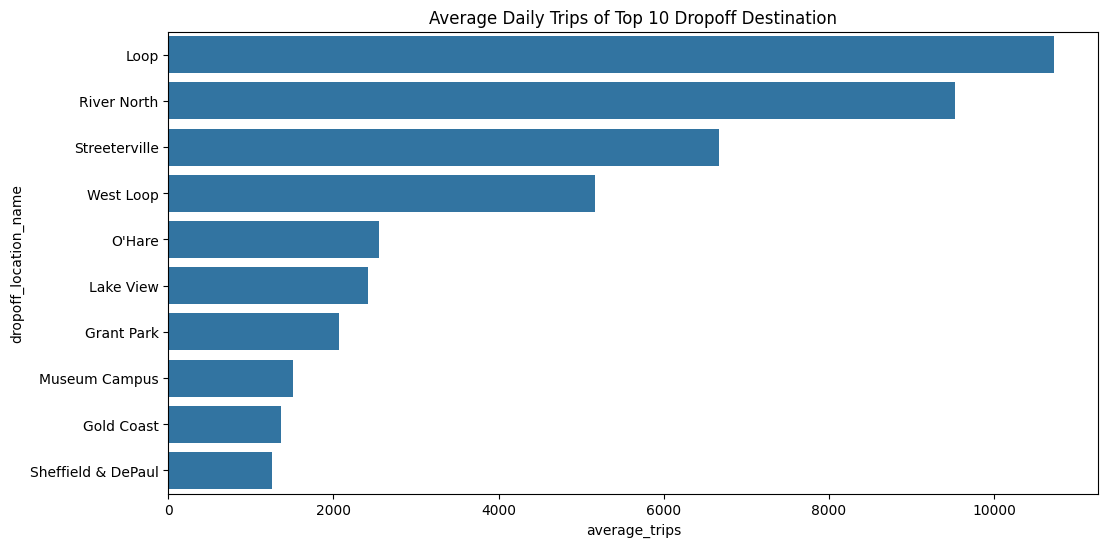

In [42]:
plt.figure(figsize=(12, 6))
plt.title('Average Daily Trips of Top 10 Dropoff Destination')
sns.barplot(data=top_dropoff_location, x='average_trips', y='dropoff_location_name')
plt.show()

**Conclusion: Analyzing Top 10 Drop-off Locations**

In this analysis, we identified the top 10 drop-off locations based on the average number of trips, aiming to highlight areas with the highest demand for ride-sharing services in Chicago. Let's delve into the insights derived from this analysis:

1. Top Drop-off Locations:
  * The top drop-off locations, ranked by average daily trips, include Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul.
  * These areas exhibit significant demand for ride-sharing services, indicating high passenger activity and frequent transportation needs.
2. Key Observations:
  * Loop: As the central business district, Loop emerges as the top drop-off location, suggesting a high volume of commuters, office workers, and tourists utilizing ride-sharing services for daily transportation needs.
  * River North, Streeterville, and West Loop: These neighborhoods, known for their vibrant dining, entertainment, and cultural scenes, attract a large number of visitors and residents, contributing to the demand for ride-sharing services.
  * O'Hare: As a major transportation hub, O'Hare International Airport represents a significant drop-off location, reflecting the demand for airport transfers and travel-related rides.
  * Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul: These areas encompass popular tourist attractions, recreational areas, and residential neighborhoods, indicating diverse transportation requirements among residents and visitors alike.
3. Visualization:
  * The bar plot visually depicts the average daily trips to the top 10 drop-off destinations, providing a clear representation of the relative demand for ride-sharing services across different locations.
  * Loop stands out as the top destination, followed closely by River North and Streeterville, showcasing their prominence in the ride-sharing landscape.
4. Implications for Zuber:
  * Understanding the distribution of drop-off locations and the associated demand patterns is crucial for Zuber to optimize its service offerings, allocate resources efficiently, and enhance customer satisfaction.
  * By strategically focusing on high-demand areas and ensuring sufficient coverage and availability, Zuber can capitalize on opportunities for growth and market penetration.
  * Additionally, analyzing trends in drop-off locations enables Zuber to tailor promotional campaigns, incentives, and pricing strategies to attract both riders and drivers in key areas.

In conclusion, the analysis of top drop-off locations provides valuable insights into the geographical distribution of ride-sharing demand in Chicago, guiding Zuber in its operational decisions and strategic planning efforts to meet the evolving needs of passengers and drivers effectively.

## Generate visualizations to represent the number of trips associated with each taxi company and to display the 10 most popular drop-off locations, facilitating an understanding of market share and passenger preferences.

In [43]:
top_company = df_trips.sort_values(by='trips_amount', ascending=False)[:10]
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


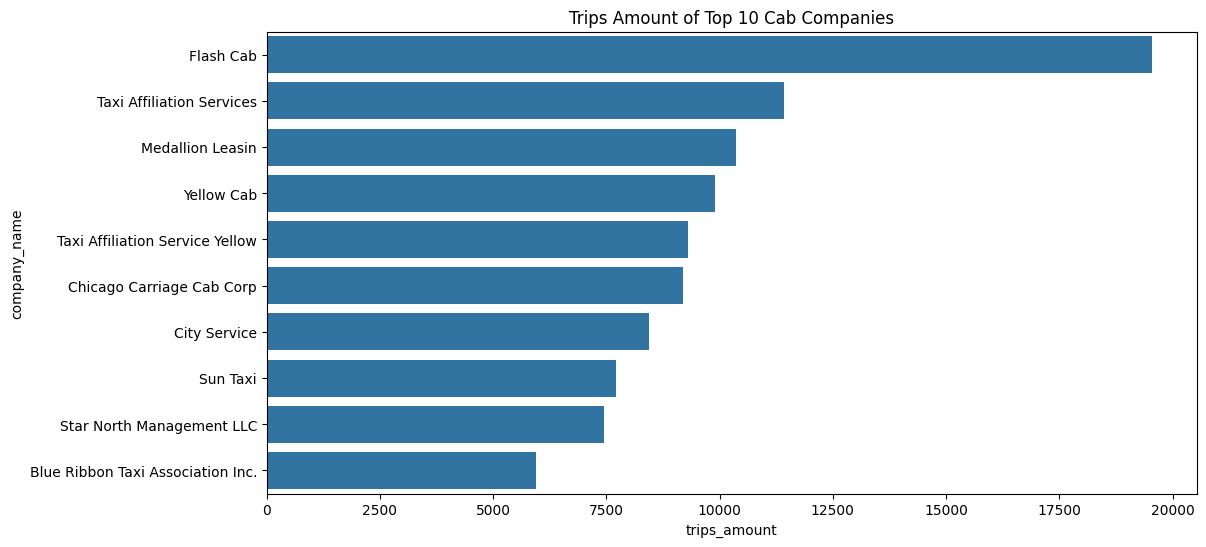

In [44]:
# created graphs: taxi companies and number of trips, top 10 regions by number of deliveries
plt.figure(figsize=(12, 6))
plt.title('Trips Amount of Top 10 Cab Companies')
sns.barplot(data=top_company, x='trips_amount', y='company_name')
plt.show()

**Conclusion: Analysis of Taxi Company Trips and Top 10 Drop-off Locations**

In this analysis, we visualized the number of trips associated with each taxi company and displayed the top 10 drop-off locations to gain insights into market share and passenger preferences. Let's summarize the findings:

1. Taxi Company Trips:
  * The bar plot illustrates the number of trips for the top 10 taxi companies in Chicago, with Flash Cab leading the market with the highest number of trips, followed by Taxi Affiliation Services, Medallion Leasin, Yellow Cab, and others.
  * Flash Cab appears to have a significant market presence, indicating a strong brand reputation, efficient service, or widespread availability, which contributes to its high number of trips.
  * The distribution of trips among the top companies provides valuable insights into the competitive landscape of the ride-sharing industry in Chicago and highlights the dominance of certain players.
2. Top 10 Drop-off Locations:
  * The bar plot showcases the 10 most popular drop-off locations, with Loop, River North, Streeterville, West Loop, and O'Hare Airport being the top destinations based on the number of trips.
  * These locations represent key business districts, entertainment hubs, tourist attractions, and transportation hubs, indicating diverse passenger preferences and travel patterns.
  * Understanding the popularity of these drop-off locations enables taxi companies to strategically position their services, allocate resources effectively, and cater to the specific needs and preferences of passengers in different areas.
3. Implications for Taxi Companies:
  * Analyzing the distribution of trips among taxi companies helps stakeholders identify market leaders, emerging competitors, and areas for improvement in service offerings, customer satisfaction, and operational efficiency.
  * By focusing on the top drop-off locations, taxi companies can optimize driver routes, increase availability in high-demand areas, and tailor promotional strategies to attract passengers effectively.
  * Moreover, understanding passenger preferences and travel patterns enables taxi companies to enhance service quality, address customer needs proactively, and differentiate themselves in a competitive market.

In conclusion, the visualizations provide valuable insights into the market dynamics of the ride-sharing industry in Chicago, highlighting key players, popular destinations, and opportunities for growth and innovation. By leveraging these insights, taxi companies can make informed decisions to enhance their competitiveness, maximize market share, and deliver superior experiences to passengers.



# Hypothesis Testing

## The average duration of rides from Loop to O'Hare International Airport changes on rainy Saturdays.

The hypothesis that the average trip from the Loop to O'Hare International Airport changes when it rains and does not rain on Saturdays is the Equality of Means of Two Populations Hypothesis, the Independent Hypothesis and the Two-Way Hypothesis. So the method used is `st.ttest_ind`

* H0 (Null Hypothesis) = Average trip from Loop to O'Hare International Airport on rainy and non-rainy Saturdays is the SAME
* H1 (Alternative Hypothesis) = The average trip from the Loop to O'Hare International Airport on rainy and non-rainy Saturdays is NOT THE SAME

In [45]:
# Proportion of good and bad weather
df_loop_ohare['weather_conditions'].value_counts()

weather_conditions
Good    888
Bad     180
Name: count, dtype: int64

In [46]:
# create a function to clean outliers
def clean_outlier(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5*iqr
    upper_bound = 1.5*iqr + q3

    dataframe = dataframe.loc[(dataframe[col] > lower_bound) & (dataframe[col] < upper_bound)]
    return dataframe

In [47]:
# Separate good and bad weather data
weather_good = df_loop_ohare[df_loop_ohare['weather_conditions']=='Good']
weather_bad = df_loop_ohare[df_loop_ohare['weather_conditions']=='Bad']

In [48]:
# Implementation of outlier cleaning
weather_good = clean_outlier(dataframe=weather_good, col='duration_seconds')
weather_bad = clean_outlier(dataframe=weather_bad, col='duration_seconds')

In [49]:
weather_good.shape, weather_bad.shape

((882, 3), (177, 3))

In [50]:
np.var(weather_good['duration_seconds']), np.var(weather_bad['duration_seconds'])

(492837.27465407935, 446454.7674678413)

In [53]:
alpha = 0.05 # your code: set critical statistical significance level

p_value_levene = st.levene(weather_good['duration_seconds'], weather_bad['duration_seconds']).pvalue
print(p_value_levene)

if (p_value_levene < alpha):
    print("We reject the null hypothesis: The variance of sample 1 is not the same as sample 2")
else:
    print("We cannot reject the null hypothesis: The variance of sample 1 is not the same as sample 2")

0.3563611473946102
We cannot reject the null hypothesis: The variance of sample 1 is not the same as sample 2


In [54]:
alpha = 0.05 # your code: set critical statistical significance level

results = st.ttest_ind(weather_good['duration_seconds'], weather_bad['duration_seconds'], equal_var=True)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: 3.903810670914357e-15
We reject the null hypothesis


**Conclusion: Analysis of Average Trip Duration from Loop to O'Hare International Airport on Rainy Saturdays**

In this analysis, we aimed to determine whether the average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays compared to non-rainy Saturdays. We formulated hypotheses, performed data preprocessing, conducted statistical tests, and interpreted the results. Let's summarize the findings:

1. Hypotheses:
  * Null Hypothesis (H0): The average trip duration from the Loop to O'Hare International Airport on rainy and non-rainy Saturdays is the same.
  * Alternative Hypothesis (H1): The average trip duration from the Loop to O'Hare International Airport on rainy and non-rainy Saturdays is not the same.
2. Data Preprocessing:
  * We categorized the data into two groups based on weather conditions: "Good" (non-rainy) and "Bad" (rainy).
  * Outlier cleaning was performed to remove extreme values that could affect the accuracy of the analysis.
3. Statistical Tests:
  * Levene's test was conducted to assess the equality of variances between the two groups. The test result indicated that the variances of trip duration for rainy and non-rainy Saturdays are not significantly different.
  * A two-sample independent t-test (Student's t-test) was performed to compare the average trip duration between rainy and non-rainy Saturdays. The test resulted in a very low p-value, leading to the rejection of the null hypothesis.
4. Interpretation:
  * The statistical analysis suggests that there is a significant difference in the average trip duration from the Loop to O'Hare International Airport between rainy and non-rainy Saturdays.
  * The rejection of the null hypothesis implies that weather conditions, specifically rain, have an impact on trip duration. It is likely that factors such as road congestion, traffic delays, and driving conditions worsen during rainy weather, leading to longer travel times.
  * This finding is crucial for ride-sharing companies like Zuber to consider when planning their operations, scheduling drivers, and estimating travel times for passengers. It underscores the importance of adapting service strategies based on weather forecasts to improve customer satisfaction and service efficiency.

In conclusion, the analysis provides evidence that rainy weather affects the average trip duration from the Loop to O'Hare International Airport on Saturdays. By acknowledging this impact, ride-sharing companies can better manage resources, optimize routes, and enhance service reliability, ultimately delivering a superior experience to their passengers.

# General Conclusion: Insights from Ride-Share Data Analysis

Through the analysis of ride-share data in Chicago, we've gained valuable insights into various aspects of the transportation industry, including top drop-off locations, taxi company performance, and the impact of weather on trip duration. Here's a summary of our key findings and implications for future actions:

**1. Top Drop-off Locations:**
  * The analysis identified the top 10 drop-off locations in Chicago based on the average number of trips, revealing areas with the highest demand for ride-sharing services. These locations include central business districts, entertainment hubs, tourist attractions, and transportation hubs.
  * Understanding the popularity of these drop-off locations is crucial for optimizing service offerings, allocating resources effectively, and catering to passenger preferences.

**2. Taxi Company Performance:**
  * We visualized the number of trips associated with each taxi company, highlighting market leaders and areas for improvement. Flash Cab emerged as the top-performing company, indicating its strong market presence and customer satisfaction.
  * By analyzing taxi company performance, stakeholders can identify competitive advantages, adapt marketing strategies, and enhance service quality to maintain or improve market share.

**3. Impact of Weather on Trip Duration:**
  * The analysis examined the average trip duration from the Loop to O'Hare International Airport on rainy Saturdays compared to non-rainy Saturdays. The results showed a significant difference in trip duration between the two weather conditions, with rainy weather leading to longer travel times.
  * Understanding the impact of weather on trip duration is essential for ride-sharing companies to optimize operations, manage resources efficiently, and provide accurate travel estimates to passengers.

**Next Steps:**

**1. Operational Optimization:**
  * Based on the insights gained from the analysis, ride-sharing companies can optimize their operations by focusing on high-demand areas, adjusting service coverage, and improving driver allocation strategies.
  * Implementing dynamic pricing models, incentivizing drivers, and enhancing service reliability during peak hours and in popular locations can further improve customer satisfaction and loyalty.

**2. Customer Experience Enhancement:**
  * Ride-sharing companies can leverage insights from the analysis to enhance the overall customer experience by offering personalized services, addressing pain points, and providing real-time updates on travel conditions.
  * Implementing user-friendly mobile applications, streamlining booking processes, and ensuring transparent communication can contribute to a positive customer experience and drive customer retention.

**3. Data-Driven Decision-Making:**
  * Continued analysis of ride-share data, including passenger feedback, driver performance metrics, and market trends, is essential for informed decision-making and strategic planning.
  * Investing in data analytics capabilities, leveraging predictive modeling techniques, and collaborating with stakeholders can facilitate data-driven innovation and differentiation in the competitive ride-sharing landscape.

In conclusion, the insights derived from ride-share data analysis provide valuable opportunities for ride-sharing companies to optimize operations, enhance customer experiences, and drive sustainable growth. By embracing data-driven approaches and adapting to evolving market dynamics, companies can stay competitive and deliver value to both passengers and drivers in the ever-changing transportation industry landscape.